## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   1.896762   755.999828  0.010339   8.310116  1.167443
1  54.907174  1478.668443  0.040616   3.280696  0.805433
2  41.884150  1357.526933  0.359222  10.140447  1.544058
3  32.754188   242.601129  0.264850   8.580532  1.011175
4   8.433793  1117.299966  0.710664  10.571958  1.516845


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9623605	total: 57.2ms	remaining: 57.1s
1:	learn: 0.9528515	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9437528	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9328965	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9221469	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9119790	total: 60.4ms	remaining: 10s
6:	learn: 0.9019404	total: 60.9ms	remaining: 8.63s
7:	learn: 0.8927114	total: 61.4ms	remaining: 7.62s
8:	learn: 0.8832217	total: 61.9ms	remaining: 6.81s
9:	learn: 0.8712287	total: 62.3ms	remaining: 6.17s
10:	learn: 0.8635183	total: 62.7ms	remaining: 5.64s
11:	learn: 0.8554452	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8471134	total: 63.7ms	remaining: 4.83s
13:	learn: 0.8383862	total: 64.1ms	remaining: 4.51s
14:	learn: 0.8300296	total: 64.5ms	remaining: 4.24s
15:	learn: 0.8204995	total: 65.1ms	remaining: 4s
16:	learn: 0.8112530	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8035216	total: 66ms	remaining: 3.6s
18:	learn: 0.7954464	total: 66.5ms	remaining: 3.44s


99:	learn: 0.3922210	total: 106ms	remaining: 954ms
100:	learn: 0.3893097	total: 106ms	remaining: 948ms
101:	learn: 0.3869801	total: 107ms	remaining: 941ms
102:	learn: 0.3841054	total: 107ms	remaining: 935ms
103:	learn: 0.3813412	total: 108ms	remaining: 930ms
104:	learn: 0.3790983	total: 108ms	remaining: 924ms
105:	learn: 0.3766687	total: 109ms	remaining: 917ms
106:	learn: 0.3743424	total: 109ms	remaining: 912ms
107:	learn: 0.3721895	total: 110ms	remaining: 906ms
108:	learn: 0.3691937	total: 110ms	remaining: 901ms
109:	learn: 0.3674504	total: 110ms	remaining: 894ms
110:	learn: 0.3652537	total: 111ms	remaining: 889ms
111:	learn: 0.3629961	total: 111ms	remaining: 883ms
112:	learn: 0.3615871	total: 112ms	remaining: 878ms
113:	learn: 0.3595112	total: 112ms	remaining: 873ms
114:	learn: 0.3571251	total: 113ms	remaining: 867ms
115:	learn: 0.3546278	total: 113ms	remaining: 863ms
116:	learn: 0.3524260	total: 114ms	remaining: 857ms
117:	learn: 0.3505429	total: 114ms	remaining: 852ms
118:	learn: 0

280:	learn: 0.1721817	total: 185ms	remaining: 474ms
281:	learn: 0.1716272	total: 185ms	remaining: 472ms
282:	learn: 0.1708505	total: 186ms	remaining: 471ms
283:	learn: 0.1700617	total: 186ms	remaining: 470ms
284:	learn: 0.1695123	total: 187ms	remaining: 469ms
285:	learn: 0.1692318	total: 187ms	remaining: 468ms
286:	learn: 0.1686453	total: 188ms	remaining: 467ms
287:	learn: 0.1683438	total: 188ms	remaining: 466ms
288:	learn: 0.1680424	total: 189ms	remaining: 465ms
289:	learn: 0.1677478	total: 189ms	remaining: 463ms
290:	learn: 0.1669255	total: 190ms	remaining: 463ms
291:	learn: 0.1661014	total: 190ms	remaining: 462ms
292:	learn: 0.1658173	total: 191ms	remaining: 461ms
293:	learn: 0.1655302	total: 191ms	remaining: 460ms
294:	learn: 0.1652458	total: 192ms	remaining: 458ms
295:	learn: 0.1646058	total: 192ms	remaining: 457ms
296:	learn: 0.1643609	total: 193ms	remaining: 456ms
297:	learn: 0.1640932	total: 193ms	remaining: 455ms
298:	learn: 0.1638225	total: 193ms	remaining: 454ms
299:	learn: 

515:	learn: 0.0892624	total: 287ms	remaining: 269ms
516:	learn: 0.0890001	total: 288ms	remaining: 269ms
517:	learn: 0.0888023	total: 288ms	remaining: 268ms
518:	learn: 0.0885243	total: 289ms	remaining: 267ms
519:	learn: 0.0882641	total: 289ms	remaining: 267ms
520:	learn: 0.0879959	total: 289ms	remaining: 266ms
521:	learn: 0.0877421	total: 290ms	remaining: 265ms
522:	learn: 0.0876703	total: 290ms	remaining: 265ms
523:	learn: 0.0874083	total: 291ms	remaining: 264ms
524:	learn: 0.0870062	total: 291ms	remaining: 263ms
525:	learn: 0.0868042	total: 292ms	remaining: 263ms
526:	learn: 0.0867337	total: 292ms	remaining: 262ms
527:	learn: 0.0865443	total: 293ms	remaining: 262ms
528:	learn: 0.0864747	total: 293ms	remaining: 261ms
529:	learn: 0.0862182	total: 294ms	remaining: 260ms
530:	learn: 0.0858261	total: 294ms	remaining: 260ms
531:	learn: 0.0856289	total: 295ms	remaining: 259ms
532:	learn: 0.0855816	total: 295ms	remaining: 259ms
533:	learn: 0.0854097	total: 296ms	remaining: 258ms
534:	learn: 

685:	learn: 0.0619830	total: 368ms	remaining: 168ms
686:	learn: 0.0619620	total: 368ms	remaining: 168ms
687:	learn: 0.0618057	total: 369ms	remaining: 167ms
688:	learn: 0.0616980	total: 369ms	remaining: 167ms
689:	learn: 0.0616772	total: 370ms	remaining: 166ms
690:	learn: 0.0614112	total: 370ms	remaining: 166ms
691:	learn: 0.0613321	total: 371ms	remaining: 165ms
692:	learn: 0.0611413	total: 371ms	remaining: 164ms
693:	learn: 0.0608665	total: 371ms	remaining: 164ms
694:	learn: 0.0608237	total: 372ms	remaining: 163ms
695:	learn: 0.0606742	total: 372ms	remaining: 163ms
696:	learn: 0.0605842	total: 373ms	remaining: 162ms
697:	learn: 0.0605061	total: 373ms	remaining: 162ms
698:	learn: 0.0603216	total: 374ms	remaining: 161ms
699:	learn: 0.0602203	total: 375ms	remaining: 161ms
700:	learn: 0.0601707	total: 375ms	remaining: 160ms
701:	learn: 0.0599763	total: 375ms	remaining: 159ms
702:	learn: 0.0598892	total: 376ms	remaining: 159ms
703:	learn: 0.0597507	total: 377ms	remaining: 158ms
704:	learn: 

916:	learn: 0.0365937	total: 470ms	remaining: 42.5ms
917:	learn: 0.0364757	total: 470ms	remaining: 42ms
918:	learn: 0.0363375	total: 470ms	remaining: 41.5ms
919:	learn: 0.0362145	total: 471ms	remaining: 40.9ms
920:	learn: 0.0361300	total: 471ms	remaining: 40.4ms
921:	learn: 0.0361080	total: 472ms	remaining: 39.9ms
922:	learn: 0.0359933	total: 472ms	remaining: 39.4ms
923:	learn: 0.0358457	total: 472ms	remaining: 38.8ms
924:	learn: 0.0357332	total: 473ms	remaining: 38.3ms
925:	learn: 0.0356145	total: 473ms	remaining: 37.8ms
926:	learn: 0.0355935	total: 473ms	remaining: 37.3ms
927:	learn: 0.0354835	total: 474ms	remaining: 36.8ms
928:	learn: 0.0354176	total: 474ms	remaining: 36.2ms
929:	learn: 0.0353526	total: 475ms	remaining: 35.7ms
930:	learn: 0.0352926	total: 475ms	remaining: 35.2ms
931:	learn: 0.0352722	total: 476ms	remaining: 34.7ms
932:	learn: 0.0351293	total: 477ms	remaining: 34.2ms
933:	learn: 0.0350221	total: 477ms	remaining: 33.7ms
934:	learn: 0.0349414	total: 477ms	remaining: 33

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

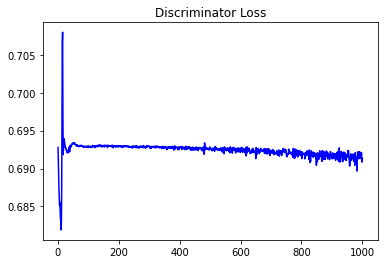

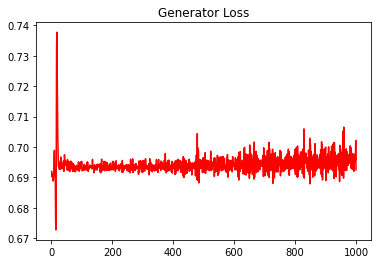

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.350917620328377


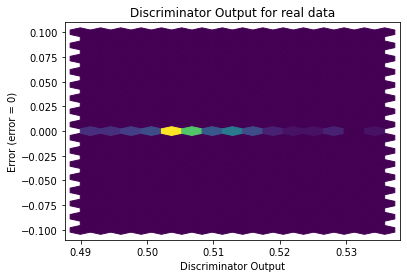

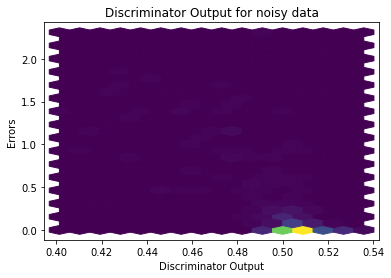

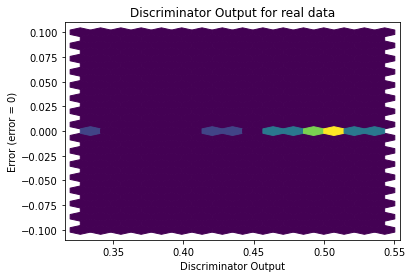

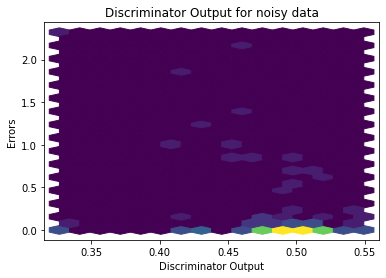

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


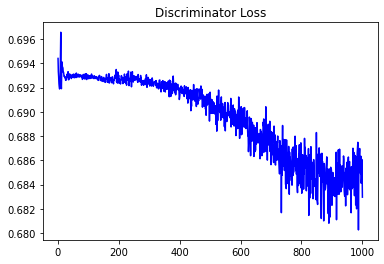

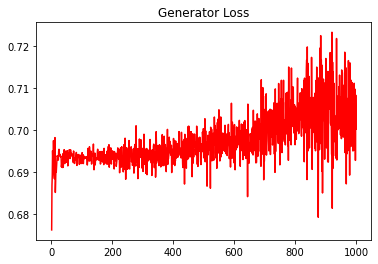

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3108225754830652


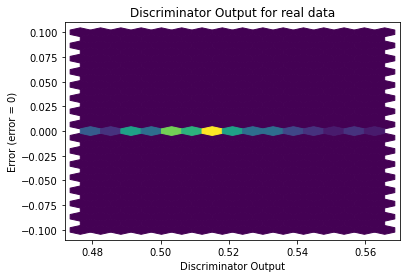

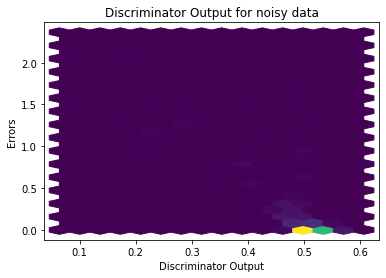

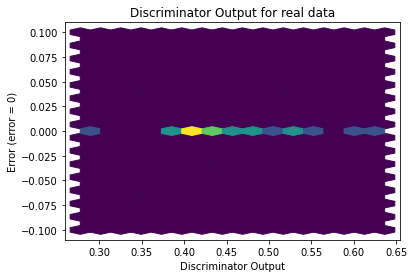

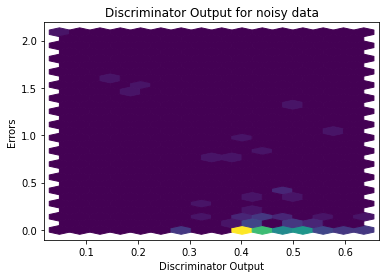

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1175]], requires_grad=True)
